In [7]:
from pydataset import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from scipy import stats

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?

###### Null Hypoth - There has been no change to network latency since switching providers
###### Alt. Hypoth - There has been an increase in network latency since switching providers


###### True Positive - We switched internet providers and there was an increase in latency
###### True Negative - We switched internet providers and there was no increase in latency

##### Type 1 Error  - We thought there was an increase in network latency due to switching internet providers but there wasn't
##### Type 2 Error - We believed there wasn't an increase in network latency due to switching providers but there actually was

- Is the website redesign any good

##### Null Hypoth - The website redesign has garnered a reaction of 0
##### Alt. Hypoth - The website redesign has garnered a reaction of > 0

#### True Positive - The website redesign received a reaction of 1
#### True Negative - The website redesign received a reaction of 0

#### Type 1 Error - We thought the website redesign brought a positive reaction over 0 but that was false
#### Type 2 Error - We believed the website redesign brought no reaction but it actually brought a reaction over 0.

- Is our television ad driving more sales?

##### Null Hypoth - The television ad did not increase sales
##### Alt. Hypoth - The television ad did increase sales

##### True Positive - The television add increased sales
##### True Negative - The television add did not increase sales

##### Type 1 Error - We thought the television add increased sales but it did not
##### Type 2 Error - We thought the televsion add didn't increase sales but it actually did

#### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [4]:
# Do two office have different average sales times
# Null hypothesis is that the office do not have a different average sales time
# Alternative hypothesis is that there is a difference in the average sales times
# We're comparing two subgroups, so we will be doing a 2 sample t-test
# Since we're looking if one group is higher than the other, one-tailed

In [8]:
null_hypothesis = "The offices do not have a different average sales time"
alternative_hypothesis = "The sales time between office is different"
confidence_level = .95
a = 1 - confidence_level # call your shot before you run your test

In [36]:
mean1 = 90
mean2 = 100

std1 = 15
std2 = 20

n1 = 40
n2 = 50

In [40]:
t, p = stats.ttest_ind_from_stats(mean1, std1, n1,
                     mean2, std2, n2)

In [41]:
t, p

(-2.6252287036468456, 0.01020985244923939)

In [42]:
if (p/2) < a and t > 0:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    print("we don't have enough evidence to support the claim that", alternative_hypothesis)

We fail to reject the null hypothesis
we don't have enough evidence to support the claim that The sales time between office is different


#### Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [43]:
df = data("mpg")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [44]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999

null_hypothesis = "There is not a differenc in fuel efficiency in cars from 2008 vs 1999"
alternative_hypothesis = "There is a difference in fuel efficiency in cars from 2008 vs 1999"
confidence_level = .95
a = 1 - confidence_level # call your shot before you run your test


In [68]:
df['average_mileage'] = df[['cty', 'hwy']].mean(numeric_only = True, axis=1).round()


In [69]:
df.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,24.0
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,26.0
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,26.0
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [70]:
year_08 = df[df.year == 2008]
year_99 = df[df.year == 1999]

<AxesSubplot:>

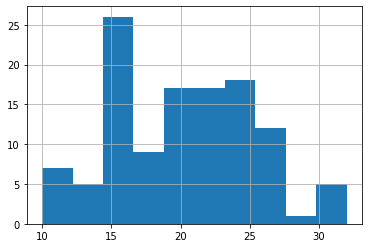

In [71]:
year_08.average_mileage.hist()

<AxesSubplot:>

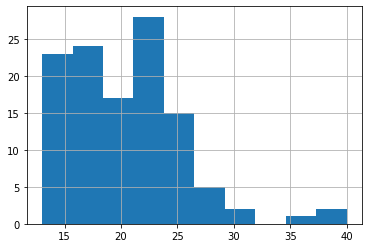

In [72]:
year_99.average_mileage.hist()

In [73]:
t, p = stats.ttest_ind(year_99.average_mileage, year_08.average_mileage)
t, p

(0.24542297716258815, 0.8063459014623406)

In [74]:
if (p/2) < a and t > 0:
    print("Reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


 ### Are compact cars more fuel-efficient than the average car?

In [114]:
# Are compact cars more fuel efficient than the average car?
# There is no difference in fuel efficiency between compact and average cars

null_hypothesis = "The compact car is not more fuel efficient than the average car"
alternative_hypothesis = "The compact car is more fuel efficient than the average car"
confidence_level = .95
alpha = 1 - confidence_level # call your shot before you run your test

In [115]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,vehicle_class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,24.0
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,26.0
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,26.0
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [116]:
df.rename(columns={'class': 'vehicle_class'}, inplace=True)

In [117]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,vehicle_class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,24.0
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,26.0
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,26.0
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [118]:
compact_class = df[df.vehicle_class == 'compact']



<AxesSubplot:>

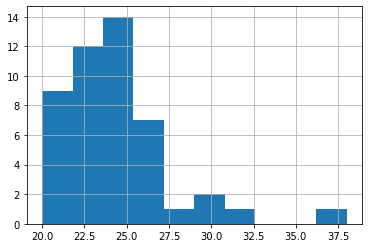

In [119]:
compact_class.average_mileage.hist()

In [120]:
df.average_mileage.mean()

20.14957264957265

In [121]:
compact_class.average_mileage.mean()

24.148936170212767

In [122]:
t, p = stats.ttest_1samp(compact_class.average_mileage, df.average_mileage.mean())

In [123]:
t, p

(7.900972010653462, 4.1406369298935154e-10)

In [125]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Failing to reject the null != 'accepting the null'")

We reject the null hypothesis that The compact car is not more fuel efficient than the average car
We move forward with the alternative hypothesis that The compact car is more fuel efficient than the average car


### Do manual cars get better gas mileage than automatic cars?

In [126]:
# Do manual cars get better gas mileage than automatic cars

null_hypothesis = "The manual vehicle does not get better gas mileage than the automatic vehicle"
alternative_hypothesis = "The manual vehicle gets better gas mileage than the automatic vehicle"
confidence_level = .95
alpha = 1 - confidence_level # call your shot before you run your test

In [136]:
manual = df[df.trans.str[0] == 'm']
auto = df[df.trans.str[0] == 'a']


<AxesSubplot:>

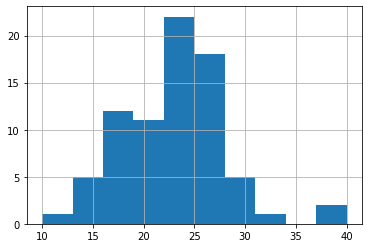

In [137]:
manual.average_mileage.hist()

<AxesSubplot:>

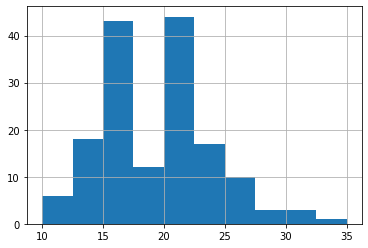

In [138]:
auto.average_mileage.hist()

In [139]:
t, p = stats.ttest_ind(manual.average_mileage, auto.average_mileage)
t, p

(4.577362852417845, 7.677168617852477e-06)

In [146]:
if (p/2) < a and t > 0:
    print("We reject the null hypothesis", null_hypothesis) 
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Failing to reject the null != 'accepting the null'")

We reject the null hypothesis The manual vehicle does not get better gas mileage than the automatic vehicle
We move forward with the alternative hypothesis that The manual vehicle gets better gas mileage than the automatic vehicle
